In [2]:
import numpy as np

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
# Load the dataset
data = pd.read_csv('nabil.csv')


In [33]:
type(data)

pandas.core.frame.DataFrame

In [32]:
# Sort the DataFrame by 'Date' in ascending order
data.sort_values(by='Date', ascending=True, inplace=True)


In [34]:

# Inspect the first few rows of the dataset
print(data.head())


     Symbol        Date    Open    High     Low   Close Percent Change  \
2205  NABIL  2014-01-01  2210.0  2180.0  2142.0  2151.0        -2.67 %   
2204  NABIL  2014-01-02  2151.0  2150.0  2090.0  2125.0        -1.21 %   
2203  NABIL  2014-01-05  2125.0  2125.0  2100.0  2125.0         0.00 %   
2202  NABIL  2014-01-06  2125.0  2118.0  2095.0  2110.0        -0.71 %   
2201  NABIL  2014-01-07  2110.0  2135.0  2070.0  2126.0         0.76 %   

         Volume  
2205     433.00  
2204  10,110.00  
2203   5,113.00  
2202   3,381.00  
2201   4,731.00  


In [35]:
data.tail()

,Symbol,Date,Open,High,Low,Close,Percent Change,Volume
4,NABIL,2023-08-24,595.0,600.0,591.1,592.5,-1.09 %,"43,106.00"
3,NABIL,2023-08-27,592.5,595.0,589.1,590.0,-0.42 %,"45,941.00"
2,NABIL,2023-08-28,596.0,596.0,590.0,590.1,0.02 %,"25,988.00"
1,NABIL,2023-08-29,592.1,596.0,588.1,590.0,-0.02 %,"29,237.00"
0,NABIL,2023-08-30,596.0,596.0,586.2,587.3,-0.46 %,"51,037.00"


In [36]:
data.columns

Index(['Symbol', 'Date', 'Open', 'High', 'Low', 'Close', 'Percent Change',
       'Volume'],
      dtype='object')

In [37]:
data.dtypes

Symbol             object
Date               object
Open              float64
High              float64
Low               float64
Close             float64
Percent Change     object
Volume             object
dtype: object

In [5]:

# Check for missing values
print(data.isnull().sum())


Symbol            0
Date              0
Open              0
High              0
Low               0
Close             0
Percent Change    0
Volume            0
dtype: int64


In [18]:

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])


In [9]:
data.head()

,Symbol,Date,Open,High,Low,Close,Percent Change,Volume
0,NABIL,2023-08-30,596.0,596.0,586.2,587.3,-0.46 %,"51,037.00"
1,NABIL,2023-08-29,592.1,596.0,588.1,590.0,-0.02 %,"29,237.00"
2,NABIL,2023-08-28,596.0,596.0,590.0,590.1,0.02 %,"25,988.00"
3,NABIL,2023-08-27,592.5,595.0,589.1,590.0,-0.42 %,"45,941.00"
4,NABIL,2023-08-24,595.0,600.0,591.1,592.5,-1.09 %,"43,106.00"


In [19]:


# Summary statistics
print(data.describe())


                                Date         Open         High          Low  \
count                           2206  2206.000000  2206.000000  2206.000000   
mean   2018-11-15 17:04:11.314596352  1343.245113  1356.737457  1326.778830   
min              2014-01-01 00:00:00   574.300000   587.000000   574.300000   
25%              2016-06-15 06:00:00   840.000000   847.000000   831.000000   
50%              2018-11-04 12:00:00  1180.000000  1190.000000  1161.500000   
75%              2021-05-15 06:00:00  1864.000000  1880.000000  1847.500000   
max              2023-08-30 00:00:00  2740.000000  2794.000000  2690.000000   
std                              NaN   575.017649   581.870537   568.463542   

             Close  
count  2206.000000  
mean   1341.129918  
min     580.000000  
25%     838.625000  
50%    1176.500000  
75%    1870.000000  
max    2700.000000  
std     575.891875  


In [40]:


data['Percent Change'] = pd.to_numeric(data['Percent Change'].str.replace('%', '', regex=False), errors='coerce')


In [47]:
 #Find rows with NaN values in 'Percent Change' column
rows_with_nan = data[data['Percent Change'].isna()]

# Calculate and replace NaN values with the formula you mentioned
for index, row in rows_with_nan.iterrows():
    if index > 0:
        prev_row = data.loc[index - 1]
        data.at[index, 'Percent Change'] = (row['Close'] - prev_row['Close']) / row['Close']



In [48]:
data.isnull().sum()

Symbol            0
Date              0
Open              0
High              0
Low               0
Close             0
Percent Change    0
Volume            0
dtype: int64

In [42]:
data.isnull().sum()

Symbol            0
Date              0
Open              0
High              0
Low               0
Close             0
Percent Change    1
Volume            0
dtype: int64

In [41]:

# Clean 'Volume' column (remove commas and convert to float)
data['Volume'] = data['Volume'].str.replace(',', '').astype(float)


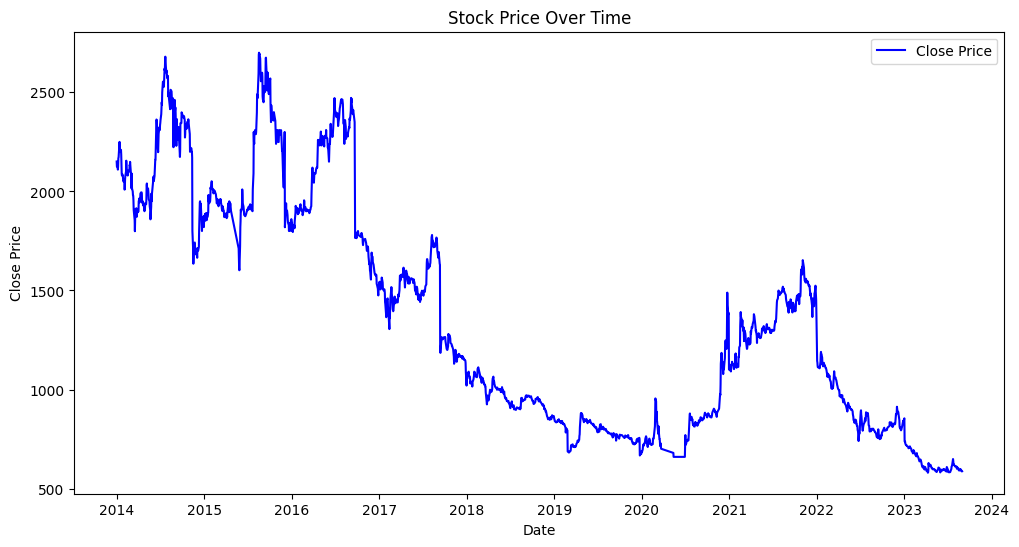

In [20]:

# Line plot of stock prices over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price Over Time')
plt.legend()
plt.show()

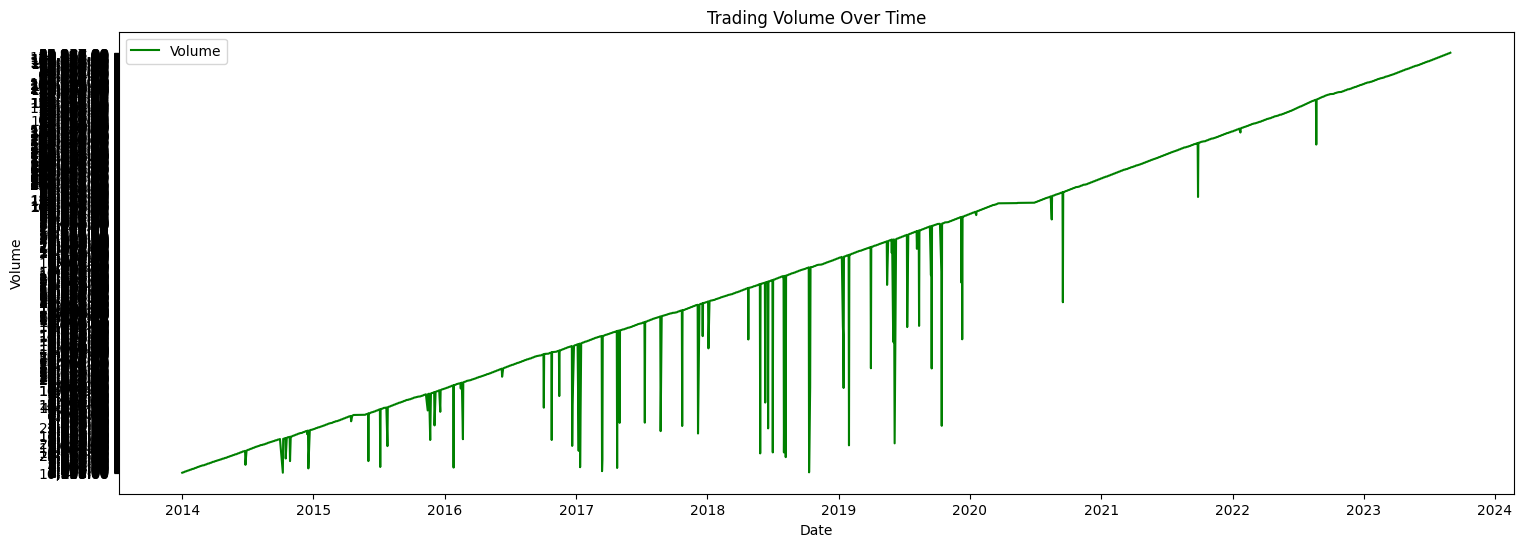

In [21]:


# Volume analysis
plt.figure(figsize=(18, 6))
plt.plot(data['Date'], data['Volume'], label='Volume', color='green')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Trading Volume Over Time')
plt.legend()
plt.show()

In [49]:
from sklearn.model_selection import train_test_split

X = data[['Open', 'High', 'Low', 'Volume']]  # Use relevant features
y = data['Close']  # Predict the 'Close' price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test)

# Evaluate the model
lr_rmse = mean_squared_error(y_test, lr_predictions, squared=False)
print(f'Linear Regression RMSE: {lr_rmse}')


Linear Regression RMSE: 11.885392497555745


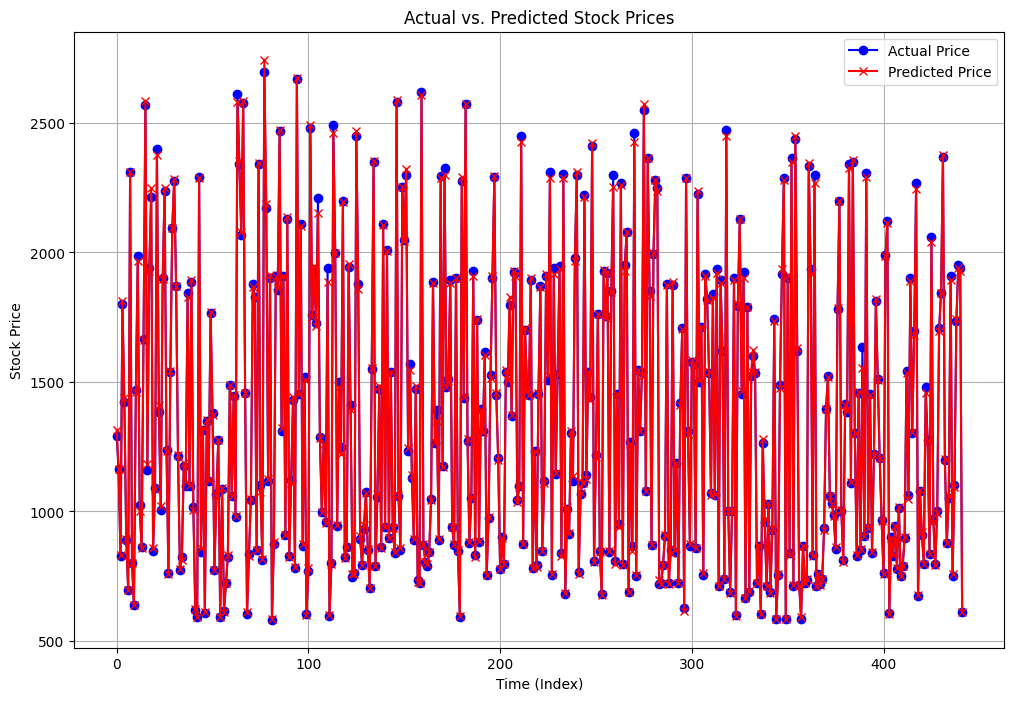

In [60]:
import matplotlib.pyplot as plt



# Create an array of numerical indices for the x-axis
x_indices = np.arange(len(y_test))

# Plot the actual vs. predicted stock prices using indices along the x-axis
plt.figure(figsize=(12, 8))
plt.plot(x_indices, y_test, label='Actual Price', color='blue', marker='o')
plt.plot(x_indices, lr_predictions, label='Predicted Price', color='red', marker='x')
plt.xlabel('Time (Index)')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.grid(True)
plt.show()


Degree2, and Polynomial Regression RMSE: 11.700050538438271


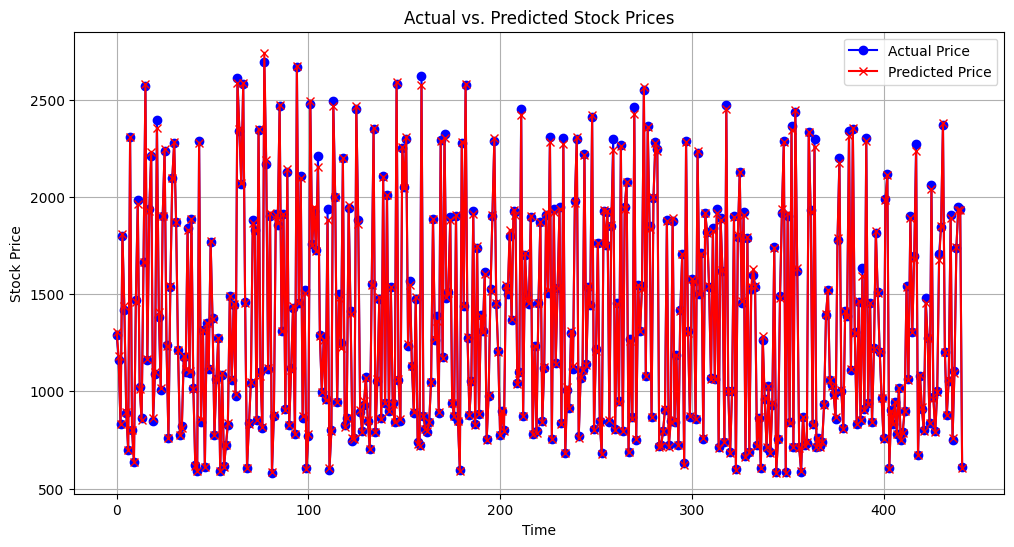

Degree3, and Polynomial Regression RMSE: 12.425803241291742


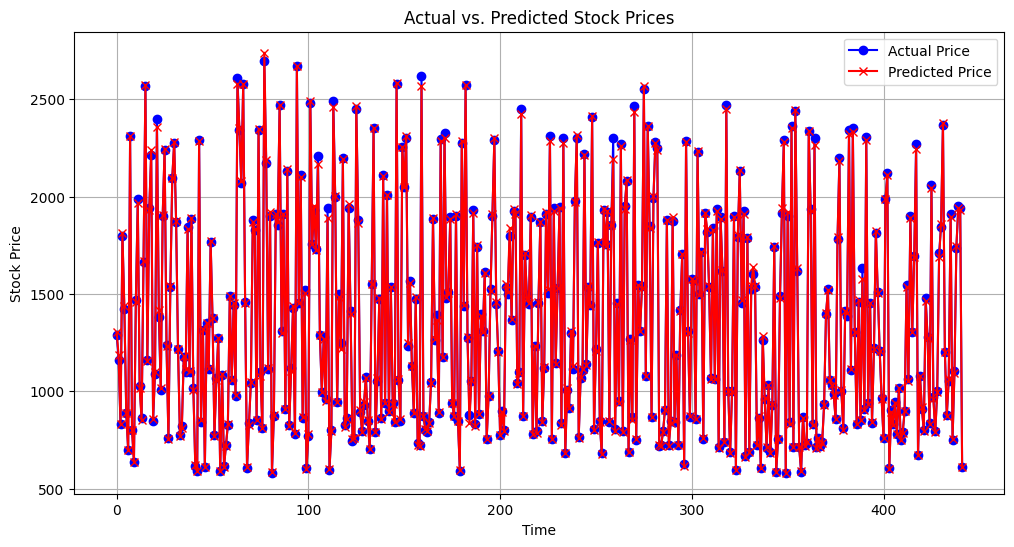

Degree4, and Polynomial Regression RMSE: 459.0655994869141


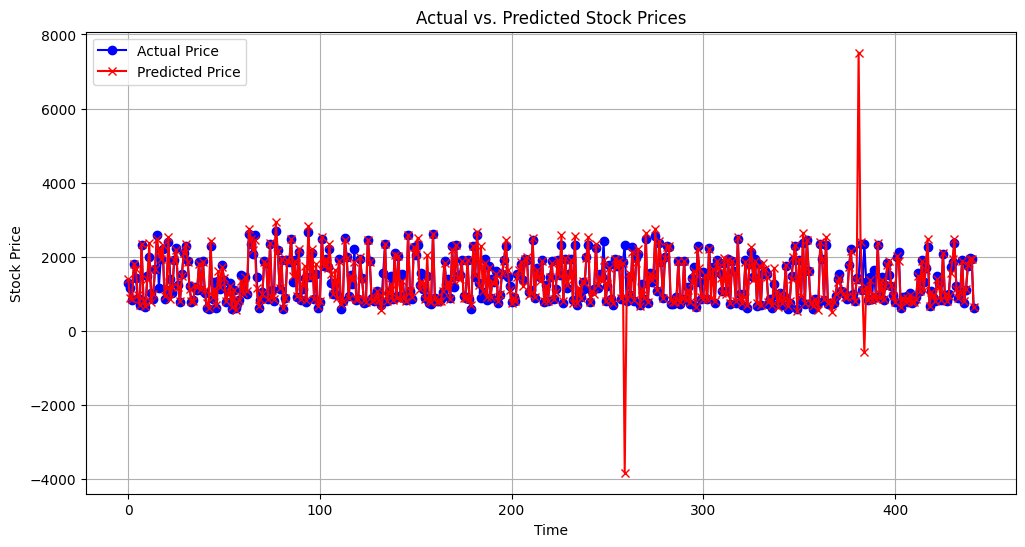

Degree5, and Polynomial Regression RMSE: 1091.0230857064726


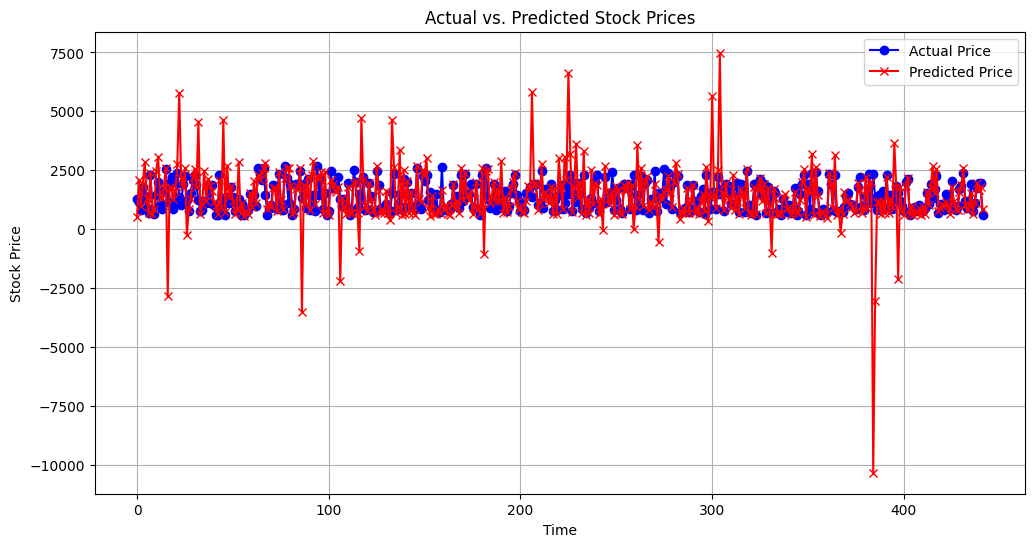

Degree6, and Polynomial Regression RMSE: 3742.2393763953264


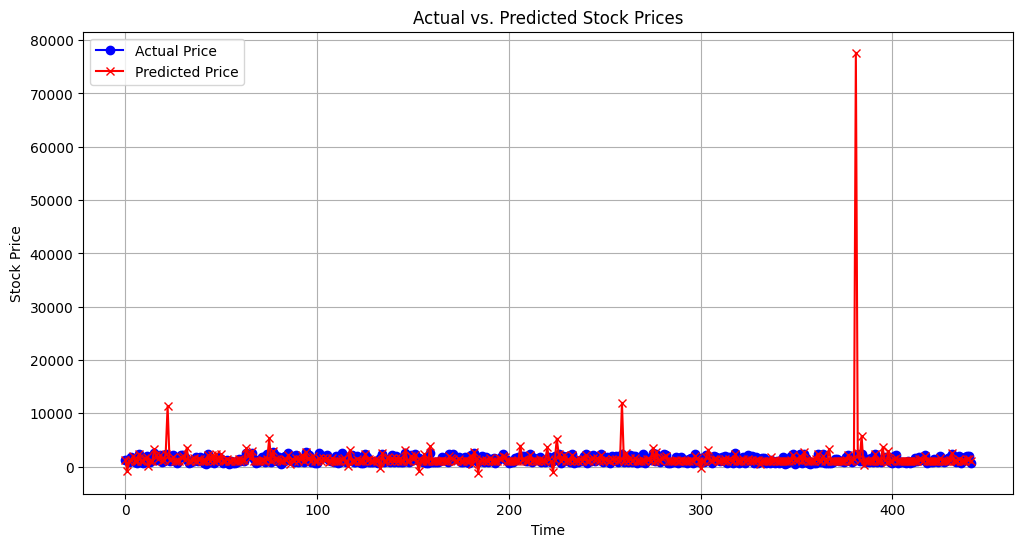

Degree7, and Polynomial Regression RMSE: 7187.297109079012


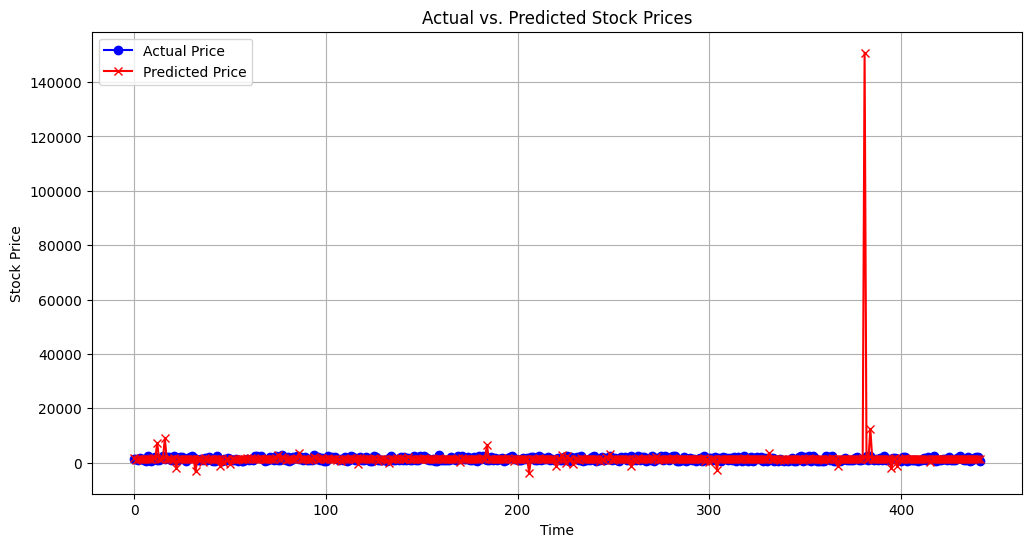

Degree8, and Polynomial Regression RMSE: 8801.584177207342


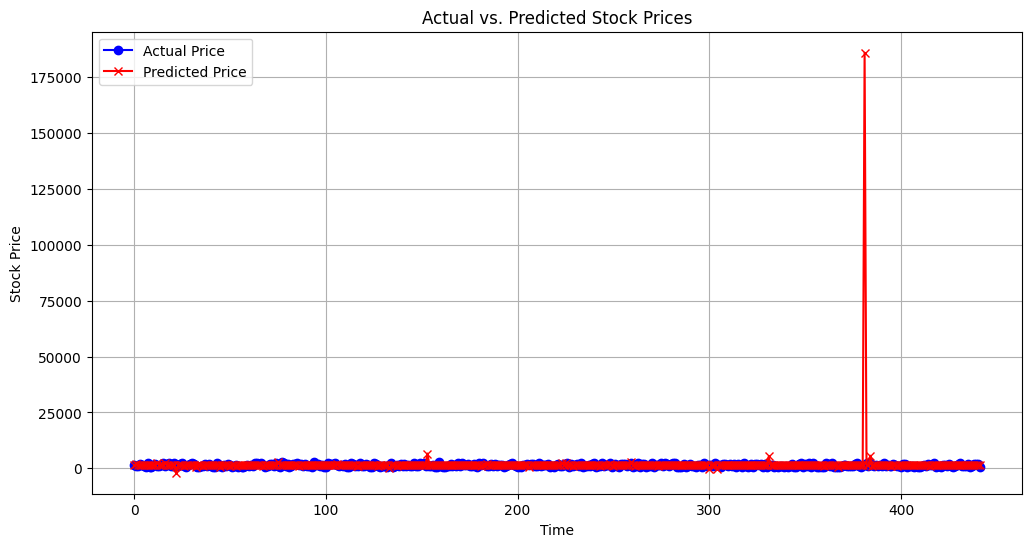

Degree9, and Polynomial Regression RMSE: 7294.500256640602


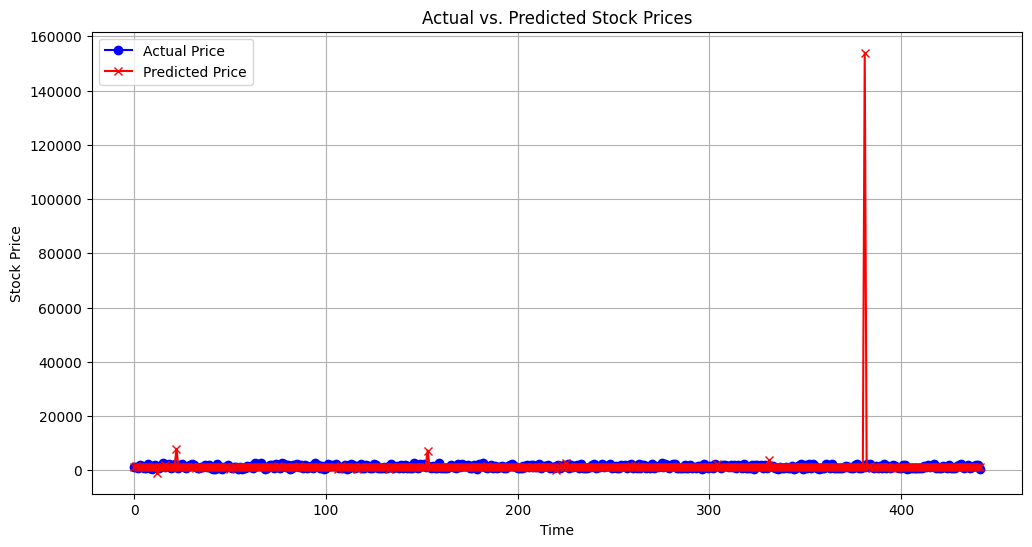

In [62]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a Polynomial Regression model
for degree in range(2,10):# = 2  # You can adjust the degree of the polynomial
    polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    polyreg.fit(X_train, y_train)

    # Make predictions
    polyreg_predictions = polyreg.predict(X_test)

    # Evaluate the model
    polyreg_rmse = mean_squared_error(y_test, polyreg_predictions, squared=False)
    print(f'Degree{degree}, and Polynomial Regression RMSE: {polyreg_rmse}')



    # Plot the actual vs. predicted stock prices
    plt.figure(figsize=(12, 6))
    plt.plot(x_indices,y_test, label='Actual Price', color='blue', marker='o')
    plt.plot(x_indices,polyreg_predictions, label='Predicted Price', color='red', marker='x')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.title('Actual vs. Predicted Stock Prices')
    plt.legend()
    plt.grid(True)
    plt.show()


SVM RMSE: 302.13757962210536


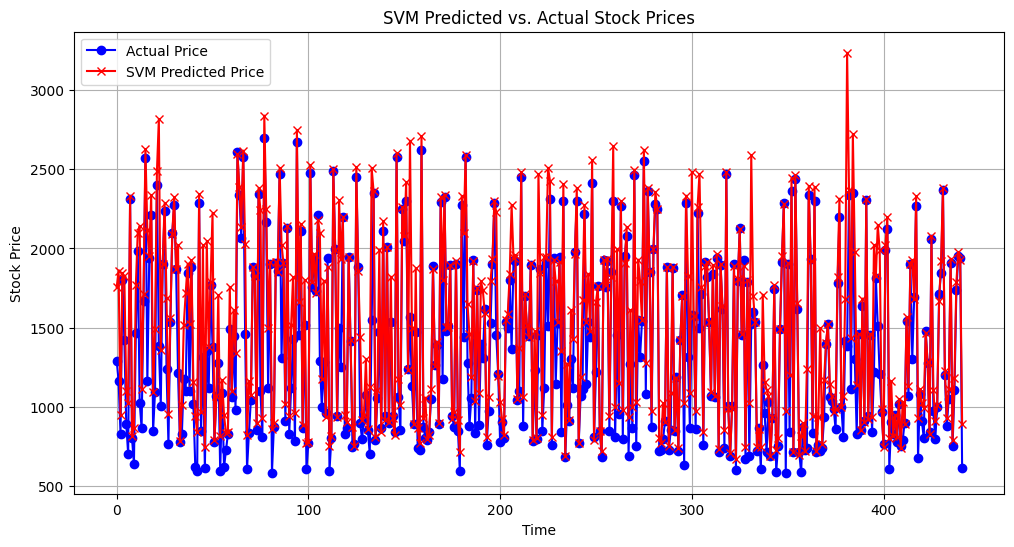

In [63]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Create and train an SVM regression model
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions
svm_predictions = svm_model.predict(X_test)

# Evaluate the SVM model
svm_rmse = mean_squared_error(y_test, svm_predictions, squared=False)
print(f'SVM RMSE: {svm_rmse}')

# Plot actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(x_indices,y_test.values, label='Actual Price', color='blue', marker='o')
plt.plot(x_indices,svm_predictions, label='SVM Predicted Price', color='red', marker='x')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('SVM Predicted vs. Actual Stock Prices')
plt.legend()
plt.grid(True)
plt.show()


In [65]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 1.8 MB/s eta 0:00:00m eta 0:00:010:00:03
Note: you may need to restart the kernel to use updated packages.


XGBoost RMSE: 14.793265124012526


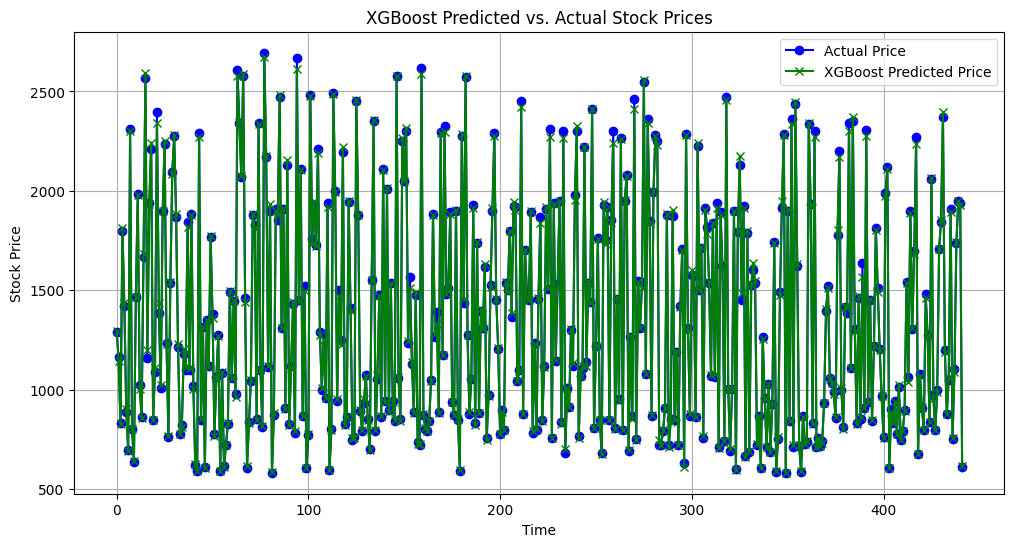

In [66]:
import xgboost as xgb

# Create and train an XGBoost regression model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the XGBoost model
xgb_rmse = mean_squared_error(y_test, xgb_predictions, squared=False)
print(f'XGBoost RMSE: {xgb_rmse}')

# Plot actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(x_indices,y_test.values, label='Actual Price', color='blue', marker='o')
plt.plot(x_indices,xgb_predictions, label='XGBoost Predicted Price', color='green', marker='x')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('XGBoost Predicted vs. Actual Stock Prices')
plt.legend()
plt.grid(True)
plt.show()


AdaBoost RMSE: 49.39732957673735


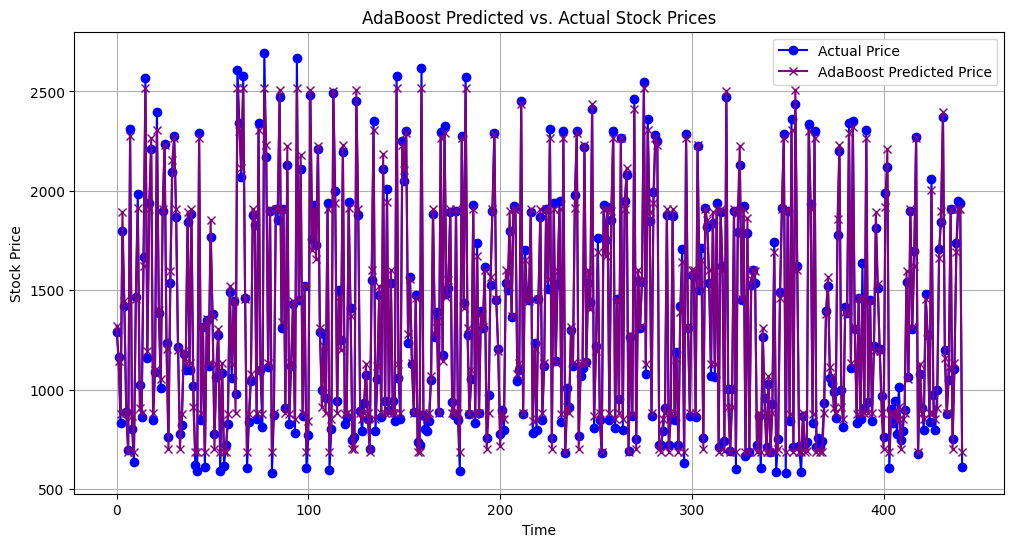

In [67]:
from sklearn.ensemble import AdaBoostRegressor

# Create and train an AdaBoost regression model
adaboost_model = AdaBoostRegressor(n_estimators=50, learning_rate=0.1)
adaboost_model.fit(X_train, y_train)

# Make predictions
adaboost_predictions = adaboost_model.predict(X_test)

# Evaluate the AdaBoost model
adaboost_rmse = mean_squared_error(y_test, adaboost_predictions, squared=False)
print(f'AdaBoost RMSE: {adaboost_rmse}')

# Plot actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(x_indices,y_test.values, label='Actual Price', color='blue', marker='o')
plt.plot(x_indices,adaboost_predictions, label='AdaBoost Predicted Price', color='purple', marker='x')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('AdaBoost Predicted vs. Actual Stock Prices')
plt.legend()
plt.grid(True)
plt.show()


2023-09-29 22:17:24.093015: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-29 22:17:24.124228: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-09-29 22:17:24.124292: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-09-29 22:17:24.124319: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-09-29 22:17:24.130199: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-29 22:17:24.130612: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

Epoch 1/100
56/56 - 1s - loss: 2111598.7500 - val_loss: 2182808.2500 - 854ms/epoch - 15ms/step
Epoch 2/100
56/56 - 0s - loss: 2079330.8750 - val_loss: 2100860.7500 - 105ms/epoch - 2ms/step
Epoch 3/100
56/56 - 0s - loss: 1882343.1250 - val_loss: 1722033.0000 - 110ms/epoch - 2ms/step
Epoch 4/100
56/56 - 0s - loss: 1299102.7500 - val_loss: 926871.6875 - 118ms/epoch - 2ms/step
Epoch 5/100
56/56 - 0s - loss: 562190.9375 - val_loss: 306516.8125 - 115ms/epoch - 2ms/step
Epoch 6/100
56/56 - 0s - loss: 202157.7812 - val_loss: 148944.7188 - 107ms/epoch - 2ms/step
Epoch 7/100
56/56 - 0s - loss: 138230.3750 - val_loss: 125480.4609 - 108ms/epoch - 2ms/step
Epoch 8/100
56/56 - 0s - loss: 117071.5938 - val_loss: 104591.4219 - 108ms/epoch - 2ms/step
Epoch 9/100
56/56 - 0s - loss: 96345.3438 - val_loss: 84455.1016 - 114ms/epoch - 2ms/step
Epoch 10/100
56/56 - 0s - loss: 76139.1719 - val_loss: 65172.7461 - 109ms/epoch - 2ms/step
Epoch 11/100
56/56 - 0s - loss: 59427.1094 - val_loss: 51426.0195 - 114ms/e

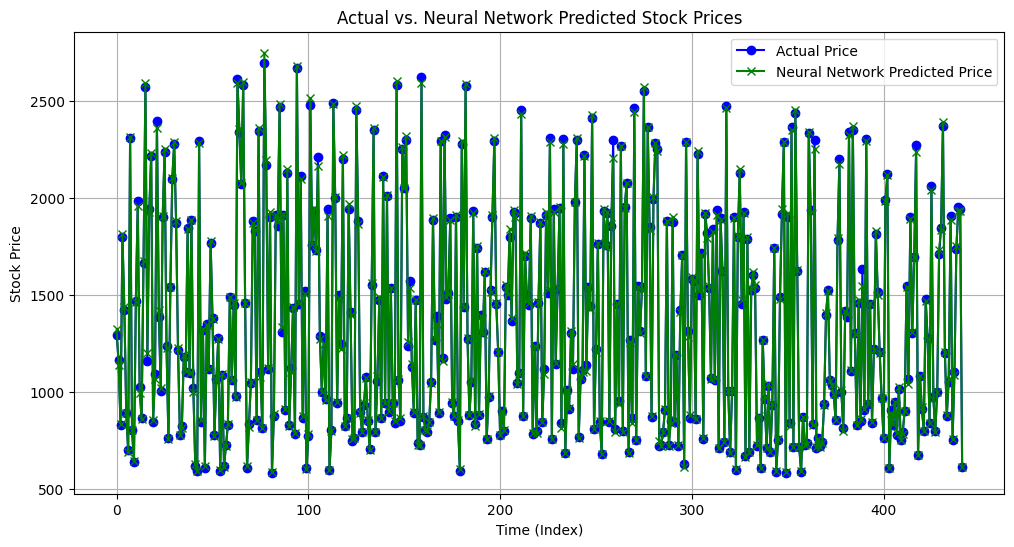

Epoch 1/100
56/56 - 1s - loss: 2090710.6250 - val_loss: 2078436.0000 - 825ms/epoch - 15ms/step
Epoch 2/100
56/56 - 0s - loss: 1379094.2500 - val_loss: 355260.5625 - 112ms/epoch - 2ms/step
Epoch 3/100
56/56 - 0s - loss: 182159.8750 - val_loss: 135924.0000 - 113ms/epoch - 2ms/step
Epoch 4/100
56/56 - 0s - loss: 112353.2500 - val_loss: 86143.4766 - 115ms/epoch - 2ms/step
Epoch 5/100
56/56 - 0s - loss: 72389.2734 - val_loss: 53463.9766 - 136ms/epoch - 2ms/step
Epoch 6/100
56/56 - 0s - loss: 46118.2578 - val_loss: 34965.4102 - 112ms/epoch - 2ms/step
Epoch 7/100
56/56 - 0s - loss: 33090.5273 - val_loss: 25178.9238 - 110ms/epoch - 2ms/step
Epoch 8/100
56/56 - 0s - loss: 24709.3906 - val_loss: 19018.3555 - 115ms/epoch - 2ms/step
Epoch 9/100
56/56 - 0s - loss: 18837.1816 - val_loss: 14151.7217 - 113ms/epoch - 2ms/step
Epoch 10/100
56/56 - 0s - loss: 14124.5615 - val_loss: 10473.6377 - 114ms/epoch - 2ms/step
Epoch 11/100
56/56 - 0s - loss: 10804.0771 - val_loss: 8249.9531 - 112ms/epoch - 2ms/ste

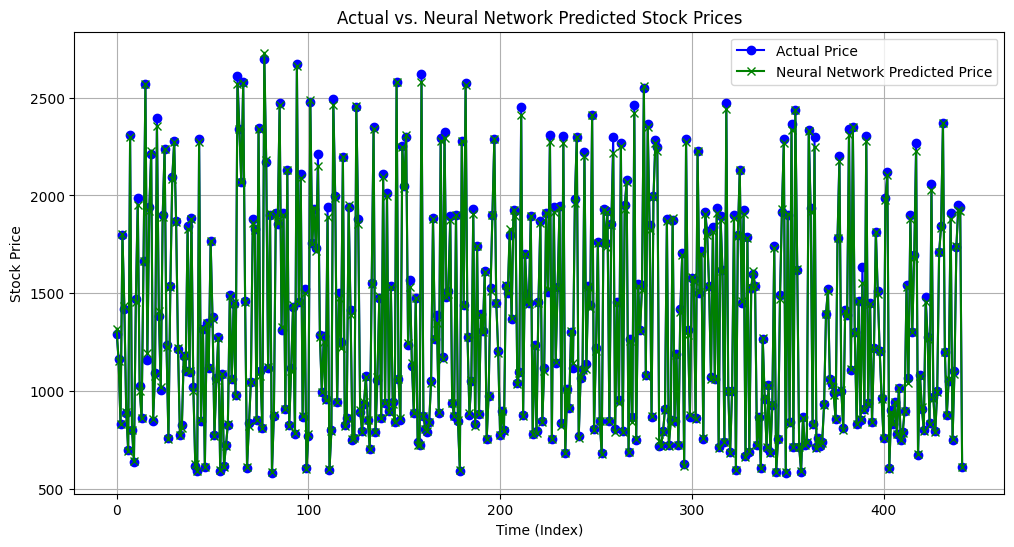

Epoch 1/100
56/56 - 1s - loss: 1957793.8750 - val_loss: 1120548.7500 - 908ms/epoch - 16ms/step
Epoch 2/100
56/56 - 0s - loss: 272471.5312 - val_loss: 118545.8203 - 125ms/epoch - 2ms/step
Epoch 3/100
56/56 - 0s - loss: 90720.6797 - val_loss: 58777.3906 - 163ms/epoch - 3ms/step
Epoch 4/100
56/56 - 0s - loss: 47139.1602 - val_loss: 35043.7461 - 130ms/epoch - 2ms/step
Epoch 5/100
56/56 - 0s - loss: 27190.9609 - val_loss: 20138.1289 - 125ms/epoch - 2ms/step
Epoch 6/100
56/56 - 0s - loss: 16254.6172 - val_loss: 10305.1562 - 140ms/epoch - 2ms/step
Epoch 7/100
56/56 - 0s - loss: 9770.3457 - val_loss: 7250.3960 - 138ms/epoch - 2ms/step
Epoch 8/100
56/56 - 0s - loss: 6342.0435 - val_loss: 4031.9998 - 128ms/epoch - 2ms/step
Epoch 9/100
56/56 - 0s - loss: 4063.3274 - val_loss: 2633.4329 - 133ms/epoch - 2ms/step
Epoch 10/100
56/56 - 0s - loss: 2640.3840 - val_loss: 1849.6820 - 134ms/epoch - 2ms/step
Epoch 11/100
56/56 - 0s - loss: 1897.1393 - val_loss: 1217.3162 - 129ms/epoch - 2ms/step
Epoch 12/10

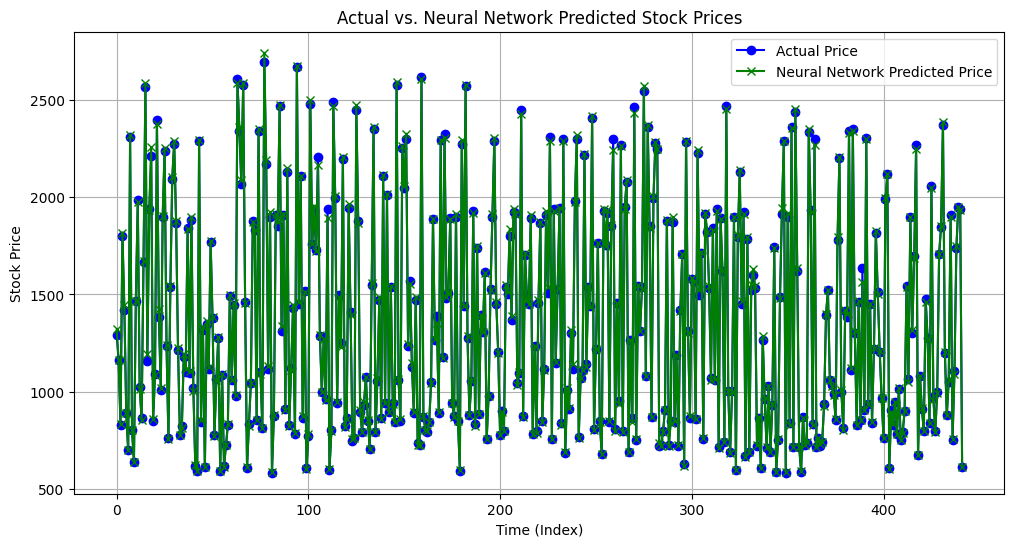

In [71]:

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset and preprocess it as needed
# Assuming you have already loaded and preprocessed your data into X and y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features (optional but recommended for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a neural network model with three hidden layers
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with one neuron for regression
])
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with one neuron for regression
])
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with one neuron for regression
])

x_indices = np.arange(len(y_test))

for model in [model1,model2,model3]:
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)
    
    # Make predictions
    nn_predictions = model.predict(X_test)
    
    # Evaluate the model
    nn_rmse = np.sqrt(mean_squared_error(y_test, nn_predictions))
    print(f'Neural Network RMSE: {nn_rmse}')
    
    # Plot actual vs. predicted prices
    plt.figure(figsize=(12, 6))
    plt.plot(x_indices,y_test, label='Actual Price', color='blue', marker='o')
    plt.plot(x_indices,nn_predictions, label='Neural Network Predicted Price', color='green', marker='x')
    plt.xlabel('Time (Index)')
    plt.ylabel('Stock Price')
    plt.title('Actual vs. Neural Network Predicted Stock Prices')
    plt.legend()
    plt.grid(True)
    plt.show()


In [72]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset and preprocess it as needed
# Assuming you have already loaded and preprocessed your data into X and y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:

# Standardize the input features (recommended for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [74]:

# Reshape the data for the RNN (sequence_length, num_features)
sequence_length = 10  # You can adjust this window size
X_train_reshaped = np.array([X_train[i:i+sequence_length] for i in range(len(X_train) - sequence_length)])
X_test_reshaped = np.array([X_test[i:i+sequence_length] for i in range(len(X_test) - sequence_length)])
y_train_reshaped = y_train[sequence_length:]
y_test_reshaped = y_test[sequence_length:]


In [75]:

# Create an RNN model
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, activation='relu', input_shape=(sequence_length, X_train.shape[1])),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with one neuron for regression
])


In [76]:

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [77]:

# Train the model
history = model.fit(X_train_reshaped, y_train_reshaped, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test_reshaped), verbose=2)


Epoch 1/100
55/55 - 1s - loss: 1436649.8750 - val_loss: 435262.7812 - 1s/epoch - 20ms/step
Epoch 2/100
55/55 - 0s - loss: 442848.2812 - val_loss: 399787.0312 - 161ms/epoch - 3ms/step
Epoch 3/100
55/55 - 0s - loss: 412004.3438 - val_loss: 409543.7812 - 168ms/epoch - 3ms/step
Epoch 4/100
55/55 - 0s - loss: 404412.4375 - val_loss: 368368.2812 - 159ms/epoch - 3ms/step
Epoch 5/100
55/55 - 0s - loss: 378809.9688 - val_loss: 410608.0312 - 169ms/epoch - 3ms/step
Epoch 6/100
55/55 - 0s - loss: 373313.7188 - val_loss: 353387.0312 - 156ms/epoch - 3ms/step
Epoch 7/100
55/55 - 0s - loss: 362948.5625 - val_loss: 344139.5938 - 187ms/epoch - 3ms/step
Epoch 8/100
55/55 - 0s - loss: 350542.4375 - val_loss: 348548.9688 - 182ms/epoch - 3ms/step
Epoch 9/100
55/55 - 0s - loss: 349456.5625 - val_loss: 333046.8750 - 175ms/epoch - 3ms/step
Epoch 10/100
55/55 - 0s - loss: 353228.4375 - val_loss: 355337.5625 - 158ms/epoch - 3ms/step
Epoch 11/100
55/55 - 0s - loss: 357987.8438 - val_loss: 352434.8438 - 187ms/epoc

In [79]:

# Make predictions
rnn_predictions = model.predict(X_test_reshaped)

# Evaluate the model
rnn_rmse = np.sqrt(mean_squared_error(y_test_reshaped, rnn_predictions))
print(f'RNN RMSE: {rnn_rmse}')


14/14 [==============================] - 0s 2ms/step
RNN RMSE: 586.6977888390085


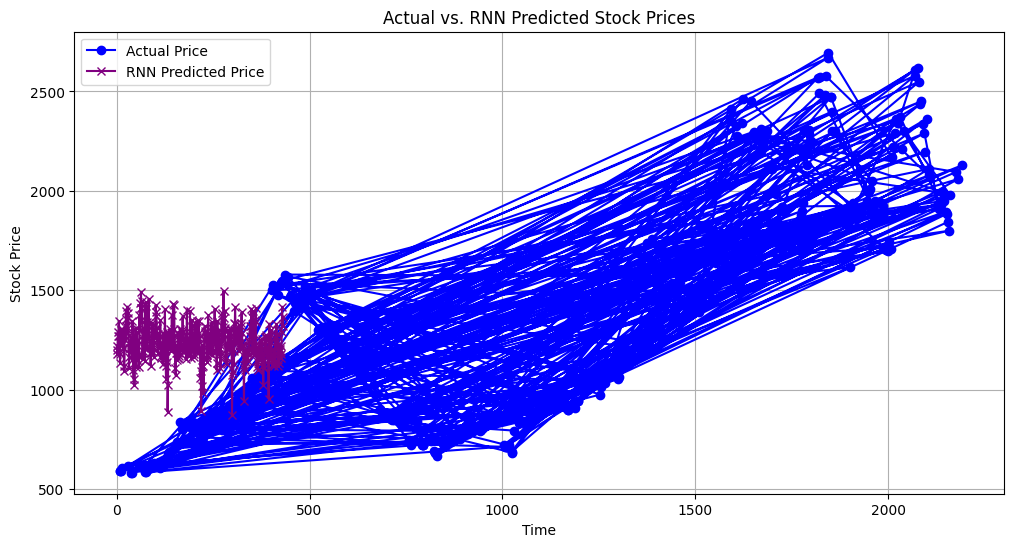

In [80]:

# Plot actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_reshaped, label='Actual Price', color='blue', marker='o')
plt.plot(rnn_predictions, label='RNN Predicted Price', color='purple', marker='x')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs. RNN Predicted Stock Prices')
plt.legend()
plt.grid(True)
plt.show()
